In [1]:
import os
import pandas as pd
from neuralprophet import NeuralProphet
from dotenv import load_dotenv
import dropbox
import requests
from utils import upload


load_dotenv()

# Function to reformat the forecast data


def reformat_forecast(forecast):
    forecast_data = []

    for i in range(24):
        step_col = f"step{i}"
        quantile_20_col = f"step{i} 20.0%"  # Column name for 20th percentile
        quantile_80_col = f"step{i} 80.0%"  # Column name for 80th percentile

        forecast_data.append({
            "ds": forecast["ds"].iloc[0] + pd.Timedelta(hours=i),
            "yhat": forecast[step_col].iloc[0],
            # Add lower bound (20th percentile)
            "yhat_lower": forecast[quantile_20_col].iloc[0],
            # Add upper bound (80th percentile)
            "yhat_upper": forecast[quantile_80_col].iloc[0]
        })

    new_forecast_df = pd.DataFrame(forecast_data)
    return new_forecast_df







Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [ ]:

data = pd.read_csv(
    'https://www.dropbox.com/scl/fi/ksf0nbmmiort5khbrgr61/allData.csv?rlkey=75e735fjk4ifttjt553ukxt3k&dl=1')
data.ds = pd.to_datetime(data.ds)
data = data.sort_values('ds')

df = data.copy()
df = df[['ds', 'Inflow_Total']].rename(columns={'ds': 'ds', 'Inflow_Total': 'y'})
params = {
    'growth': 'off',
    'yearly_seasonality': True,
    'weekly_seasonality': True,
    'daily_seasonality': True,
    'n_lags': 48,
    'n_forecasts': 24,
    'epochs': 10,
    'quantiles': [0.2, 0.5, 0.8]
}
m = NeuralProphet(**params)
m.set_plotting_backend("plotly-static")
metrics = m.fit(df[['ds', 'y']], freq='h', progress='plot')
df_future = m.make_future_dataframe(df[['ds', 'y']], periods=24)
forecast = m.predict(df_future, decompose=False, raw=True)
output_df = reformat_forecast(forecast)
inflow_total_np = output_df.copy()
inflow_total_np


In [17]:
output_df = reformat_forecast(forecast)
inflow_total_np = output_df.copy()
inflow_total_np

,ds,yhat,yhat_lower,yhat_upper
0,2025-02-19 21:00:00,10.448245,6.668163,13.073761
1,2025-02-19 22:00:00,2.077533,2.077533,10.759732
2,2025-02-19 23:00:00,0.911909,0.911909,3.864741
3,2025-02-20 00:00:00,5.216775,2.950565,5.316026
4,2025-02-20 01:00:00,4.249613,3.736405,9.952942
5,2025-02-20 02:00:00,1.691469,-4.334993,1.691469
6,2025-02-20 03:00:00,-1.216104,-4.887511,1.268948
7,2025-02-20 04:00:00,-1.026737,-1.866168,1.715639
8,2025-02-20 05:00:00,1.652499,-2.983447,7.700367
9,2025-02-20 06:00:00,1.556916,1.556916,2.386874


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.892% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/env

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/264 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

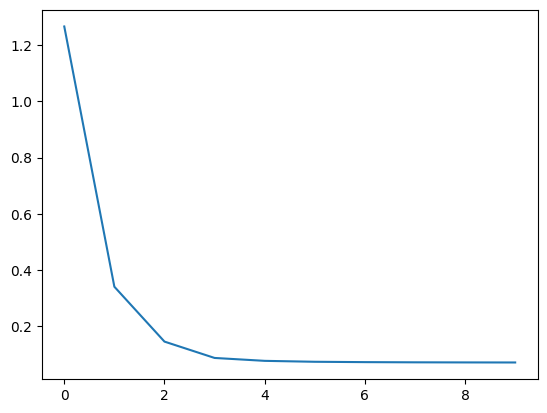

In [19]:




data['y'] = data['POD_GREEN_TBS']+data['POD_YELLOW_TBS']+data['POD_ORANGE_TBS'] + \
    data['TRG_HALLWAY_TBS']+data['RAZ_TBS'] + \
    data['AMBVERTTBS']+data['QTrack_TBS']+data['Garage_TBS']
df = data.copy()
df = df[['ds', 'y', 'Inflow_Total']]

params = {
    'growth': 'off',
    'yearly_seasonality': True,
    'weekly_seasonality': True,
    'daily_seasonality': True,
    'n_lags': 48,
    'n_forecasts': 24,
    'epochs': 10,
    'quantiles': [0.2, 0.5, 0.8]
}

m = NeuralProphet(**params)
m.set_plotting_backend("plotly-static")
m.add_future_regressor('Inflow_Total')
metrics = m.fit(df, freq='h', progress='plot')

In [20]:
inflow_total_np

,ds,yhat,yhat_lower,yhat_upper
0,2025-02-19 21:00:00,10.448245,6.668163,13.073761
1,2025-02-19 22:00:00,2.077533,2.077533,10.759732
2,2025-02-19 23:00:00,0.911909,0.911909,3.864741
3,2025-02-20 00:00:00,5.216775,2.950565,5.316026
4,2025-02-20 01:00:00,4.249613,3.736405,9.952942
5,2025-02-20 02:00:00,1.691469,-4.334993,1.691469
6,2025-02-20 03:00:00,-1.216104,-4.887511,1.268948
7,2025-02-20 04:00:00,-1.026737,-1.866168,1.715639
8,2025-02-20 05:00:00,1.652499,-2.983447,7.700367
9,2025-02-20 06:00:00,1.556916,1.556916,2.386874


In [21]:
df_future = m.make_future_dataframe(df[['ds', 'y', 'Inflow_Total']], periods=24, regressors_df=inflow_total_np[['ds', 'yhat']].rename(columns={'ds': 'ds', 'yhat': 'Inflow_Total'}))
df_future

WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.892% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and w

,ds,y,Inflow_Total
0,2025-02-17 21:00:00,15.0,9.000000
1,2025-02-17 22:00:00,14.0,9.000000
2,2025-02-17 23:00:00,12.0,4.000000
3,2025-02-18 00:00:00,17.0,4.000000
4,2025-02-18 01:00:00,22.0,7.000000
...,...,...,...
67,2025-02-20 16:00:00,NaN,15.230414
68,2025-02-20 17:00:00,NaN,10.000674
69,2025-02-20 18:00:00,NaN,10.372676
70,2025-02-20 19:00:00,NaN,6.071334


In [22]:
forecast = m.predict(df_future, decompose=False, raw=True)

output_df = reformat_forecast(forecast)

output_df.to_csv('total_tbs_np.csv', index=False)

dropbox_app_key = os.environ.get("DROPBOX_APP_KEY")
dropbox_app_secret = os.environ.get("DROPBOX_APP_SECRET")
dropbox_refresh_token = os.environ.get("DROPBOX_REFRESH_TOKEN")

# exchange the authorization code for an access token:
token_url = "https://api.dropboxapi.com/oauth2/token"
params = {
    "grant_type": "refresh_token",
    "refresh_token": dropbox_refresh_token,
    "client_id": dropbox_app_key,
    "client_secret": dropbox_app_secret
}
r = requests.post(token_url, data=params)
# print(r.text)

dropbox_access_token = r.json()['access_token']

dbx = dropbox.Dropbox(dropbox_access_token)

upload(dbx, 'total_tbs_np.csv', '', '',
            'total_tbs_np.csv', overwrite=True)

print(output_df)

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 98.611% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/devinhopkins/anaconda3/envs/ed-flow-2023/lib/python3.10/s

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


ListSharedLinksResult(cursor=NOT_SET, has_more=False, links=[FileLinkMetadata(client_modified=datetime.datetime(2025, 2, 20, 2, 7, 1), content_owner_team_info=NOT_SET, expires=NOT_SET, id='id:oNSmVCFixyQAAAAAAAAMtQ', link_permissions=LinkPermissions(allow_comments=False, allow_download=True, audience_options=[LinkAudienceOption(allowed=True, audience=LinkAudience('public', None), disallowed_reason=NOT_SET), LinkAudienceOption(allowed=False, audience=LinkAudience('team', None), disallowed_reason=LinkAudienceDisallowedReason('user_not_on_team', None)), LinkAudienceOption(allowed=True, audience=LinkAudience('no_one', None), disallowed_reason=NOT_SET)], can_allow_download=True, can_disallow_download=True, can_remove_expiry=True, can_remove_password=True, can_revoke=True, can_set_expiry=True, can_set_password=True, can_use_extended_sharing_controls=True, effective_audience=LinkAudience('public', None), link_access_level=LinkAccessLevel('viewer', None), requested_visibility=RequestedVisibili

In [106]:
import base64
import json
import os
import requests
import pandas as pd
from prophet import Prophet
from tqdm import tqdm
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from utils import upload
import dropbox
import time
import datetime
import math

load_dotenv()

def upload_to_dropbox(dbx, fullname, folder, subfolder, name, overwrite=False):
    """Upload a file.
    Return the request response, or None in case of error.
    """
    path = '/%s/%s/%s' % (folder, subfolder.replace(os.path.sep, '/'), name)
    while '//' in path:
        path = path.replace('//', '/')
    mode = (dropbox.files.WriteMode.overwrite
            if overwrite
            else dropbox.files.WriteMode.add)
    mtime = os.path.getmtime(fullname)
    with open(fullname, 'rb') as f:
        data = f.read()
    try:
        res = dbx.files_upload(
            data, path, mode,
            client_modified=datetime.datetime(*time.gmtime(mtime)[:6]),
            mute=True)
        check_for_links = dbx.sharing_list_shared_links(path)
        if check_for_links.links:
            link_to_file = check_for_links.links[0].url
        else:
            shared_link_metadata = dbx.sharing_create_shared_link_with_settings(path)
            link_to_file = shared_link_metadata.url

    except dropbox.exceptions.ApiError as err:
        print('*** API error', err)
        return None
    print('uploaded as', res.name.encode('utf8'))
    return link_to_file

allData = pd.read_csv(
    'https://www.dropbox.com/scl/fi/ksf0nbmmiort5khbrgr61/allData.csv?rlkey=75e735fjk4ifttjt553ukxt3k&dl=1')
allData.ds = pd.to_datetime(allData.ds)

df = allData.copy()
df.ds = pd.to_datetime(df.ds)

df['total_tbs'] = df[['TRG_HALLWAY_TBS',
                      'POD_GREEN_TBS',
                      'POD_YELLOW_TBS',
                      'POD_ORANGE_TBS',
                      'RAZ_TBS',
                      'AMBVERTTBS',
                      'QTrack_TBS',
                      'Garage_TBS']].sum(axis=1)
df['vert_tbs'] = df[[
    'RAZ_TBS',
    'AMBVERTTBS',
    'QTrack_TBS',
    'Garage_TBS']].sum(axis=1)
df['pod_tbs'] = df[['TRG_HALLWAY_TBS',
                    'POD_GREEN_TBS',
                    'POD_YELLOW_TBS',
                    'POD_ORANGE_TBS',
                    ]].sum(axis=1)
df.tail()

# tbs_columns = ['total_tbs', 'vert_tbs', 'pod_tbs']
tbs_columns = ['total_tbs']


output = pd.DataFrame()
FIRST_RUN = True

for column in tqdm(tbs_columns):
    if column in ['ds']:
        continue
    try:
        print('working on '+column)

        m = Prophet(interval_width=0.95)
        m.fit(df[['ds', column]].rename(columns={column: 'y'}))
        future = m.make_future_dataframe(periods=24*1, freq='h')
        # forecast = m.predict(future.tail(24*14))
        forecast = m.predict(future)
        if FIRST_RUN:
            output['ds'] = forecast['ds']

        for forecast_column in ['yhat', 'yhat_lower', 'yhat_upper']:
            kwargs = {column+'_'+forecast_column: forecast[forecast_column]}
            output = output.assign(**kwargs)
        FIRST_RUN = False
    except:
        print(column + ' failed')

data = df.copy()
alerts = []
critical_alerts = []



  0%|          | 0/1 [00:00<?, ?it/s]

working on total_tbs


23:59:12 - cmdstanpy - INFO - Chain [1] start processing
23:59:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:25<00:00, 25.65s/it]


In [107]:

total_tbs_np = pd.read_csv('https://www.dropbox.com/scl/fi/w82obtpfnxdtdaq5zoran/total_tbs_np.csv?rlkey=bndevo6c0qi0bdi5ponko99ej&st=34o472dp&dl=1')
total_tbs_np.ds = pd.to_datetime(total_tbs_np.ds)
# total_tbs_np = total_tbs_np.set_index(pd.to_datetime(total_tbs_np['ds']).dt.hour)
# most_recent_timestamp = pd.to_datetime(data['ds']).iloc[-1]
# total_tbs_np = total_tbs_np[total_tbs_np['ds'].dt.date == most_recent_timestamp.date()]
total_tbs_np


,ds,yhat,yhat_lower,yhat_upper
0,2025-02-20 00:00:00,16.665510,12.691567,20.935955
1,2025-02-20 01:00:00,15.247225,11.806444,19.021978
2,2025-02-20 02:00:00,15.354142,11.804632,19.201860
3,2025-02-20 03:00:00,12.085272,8.713212,15.672646
4,2025-02-20 04:00:00,9.173150,6.114705,12.830657
5,2025-02-20 05:00:00,6.532515,3.919413,9.672646
6,2025-02-20 06:00:00,3.813138,1.450566,6.446216
7,2025-02-20 07:00:00,5.689567,3.490568,8.059541
8,2025-02-20 08:00:00,9.072492,7.244999,11.672167
9,2025-02-20 09:00:00,8.124502,6.167890,10.782496


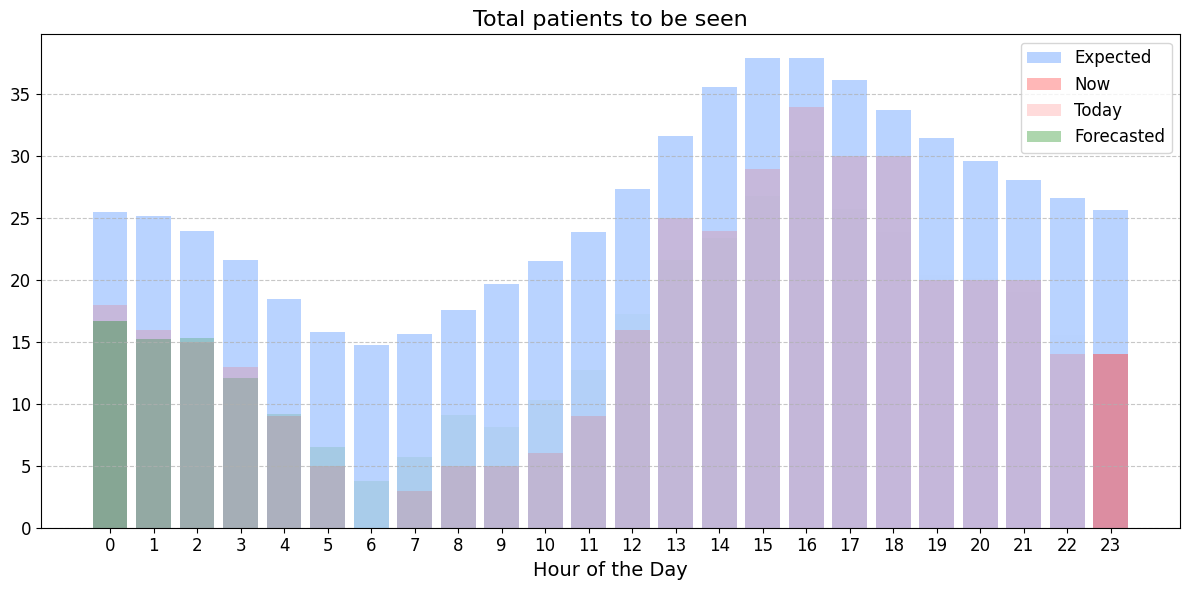

In [108]:
metric = 'total_tbs'
# Calculate total patients to be seen as the sum of specified columns

# Extract hour from the timestamp for grouping
data['Hour'] = pd.to_datetime(data['ds']).dt.hour

# Group by hour and calculate the average number of patients for each hour
hourly_data = data.groupby('Hour')[metric].mean()

# Identify the most recent timestamp's hour and its corresponding value
most_recent_timestamp = pd.to_datetime(data['ds']).iloc[-1]
most_recent_hour = most_recent_timestamp.hour
most_recent_value = data.loc[pd.to_datetime(
    data['ds']) == most_recent_timestamp, metric].iloc[0]
recent_data = data.loc[pd.to_datetime(data['ds']) >= pd.to_datetime(
    most_recent_timestamp.date()), metric]
recent_data = recent_data.reset_index(drop=True)

# Extract the day of the week for the most recent timestamp
most_recent_day_of_week = most_recent_timestamp.dayofweek

# Filter the data to include only rows matching the same day of the week
same_day_data = data[pd.to_datetime(
    data['ds']).dt.dayofweek == most_recent_day_of_week]

# Group by hour and calculate the average number of patients for this specific day of the week
hourly_data_same_day = same_day_data.groupby('Hour')[metric].mean()

prophet_data = output[['ds', metric+'_yhat',
                        metric+'_yhat_lower', metric+'_yhat_upper']].copy()
prophet_data['Hour'] = pd.to_datetime(prophet_data['ds']).dt.hour
prophet_data_today = prophet_data[prophet_data.ds.dt.date ==
                                    most_recent_timestamp.date()]
prophet_data_today = prophet_data_today.reset_index(drop=True)

prophet_data_today.tail()
# Plot the updated graph with colors matching the example and no vertical grid lines
plt.figure(figsize=(12, 6))
# plt.bar(hourly_data_same_day.index, hourly_data_same_day, color='#5293ff', alpha=0.4, label='Expected')
plt.bar(prophet_data_today.index,
        prophet_data_today[metric+'_yhat'], color='#5293ff', alpha=0.4, label='Expected')

plt.bar(
    most_recent_hour, most_recent_value, color='#ff4d4d', alpha=0.4, label='Now'
)
plt.bar(
    recent_data.index, recent_data, color='#ff4d4d', alpha=0.2, label='Today'
)

my_index=0
for index,row in total_tbs_np.iterrows():
    # print(index)
    my_index = my_index+1
    if my_index == 1:
        plt.bar(index, row.yhat, color='green', alpha=0.4*(math.pow(0.8,my_index)), label='Forecasted')
    else:
        plt.bar(index, row.yhat, color='green', alpha=0.4*(math.pow(0.8,my_index)))


plt.xlabel('Hour of the Day', fontsize=14)
# plt.ylabel(metric, fontsize=14)
if metric == 'total_tbs':
    plt.title('Total patients to be seen', fontsize=16)
elif metric == 'vert_tbs':
    plt.title('Vertical patients to be seen', fontsize=16)
elif metric == 'pod_tbs':
    plt.title('Pod patients to be seen', fontsize=16)
else:
    plt.title(metric, fontsize=16)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(False, axis='x')  # Remove vertical grid lines
plt.tight_layout()
# plt.show()
plt.savefig(metric+'.png')



In [4]:
prophet_data_today.set_index('ds', inplace=True)
prophet_data_today

NameError: name 'prophet_data_today' is not defined

In [47]:
data.tail(12)

,ds,INFLOW_STRETCHER,Infl_Stretcher_cum,INFLOW_AMBULATORY,Infl_Ambulatory_cum,Inflow_Total,Inflow_Cum_Total,INFLOW_AMBULANCES,Infl_Ambulances_cum,FLS,...,RAZ_CONS_MORE2H,RAZ_IMCONS_MORE4H,RAZ_XRAY_MORE2H,RAZ_CT_MORE2H1,PSYCH1,PSYCH_WAITINGADM,total_tbs,vert_tbs,pod_tbs,Hour
36183,2025-02-19 09:00:00,4,15,5,12,9,27,2,6,0,...,13,1,0,0,13,12,5.0,5.0,0,9
36184,2025-02-19 10:00:00,5,20,5,17,10,37,1,7,0,...,11,1,0,0,13,12,6.0,4.0,2,10
36185,2025-02-19 11:00:00,8,28,9,26,17,54,3,10,0,...,9,1,1,0,13,12,9.0,8.0,1,11
36186,2025-02-19 12:00:00,11,39,10,36,21,75,1,11,0,...,10,1,0,0,13,12,16.0,16.0,0,12
36187,2025-02-19 13:00:00,13,52,8,44,21,96,2,13,0,...,7,1,0,0,13,11,25.0,24.0,1,13
36188,2025-02-19 14:00:00,10,62,4,48,14,110,2,15,0,...,11,1,2,3,12,8,24.0,22.0,2,14
36189,2025-02-19 15:00:00,14,76,4,52,18,128,4,19,0,...,9,1,0,0,12,8,29.0,22.0,7,15
36190,2025-02-19 16:00:00,7,83,5,57,12,140,1,20,0,...,8,1,1,0,13,8,34.0,27.0,7,16
36191,2025-02-19 17:00:00,13,96,5,62,18,158,2,22,0,...,10,0,3,1,14,8,30.0,23.0,7,17
36192,2025-02-19 18:00:00,7,103,2,64,9,167,3,25,0,...,10,0,1,0,15,8,30.0,25.0,5,18


In [101]:
data.tail(1).total_tbs.values[0]

20.0

In [103]:
prophet_data_filtered.set_index('ds').loc[data.tail(1).ds].total_tbs_yhat_upper.values[0]

46.27563038688846

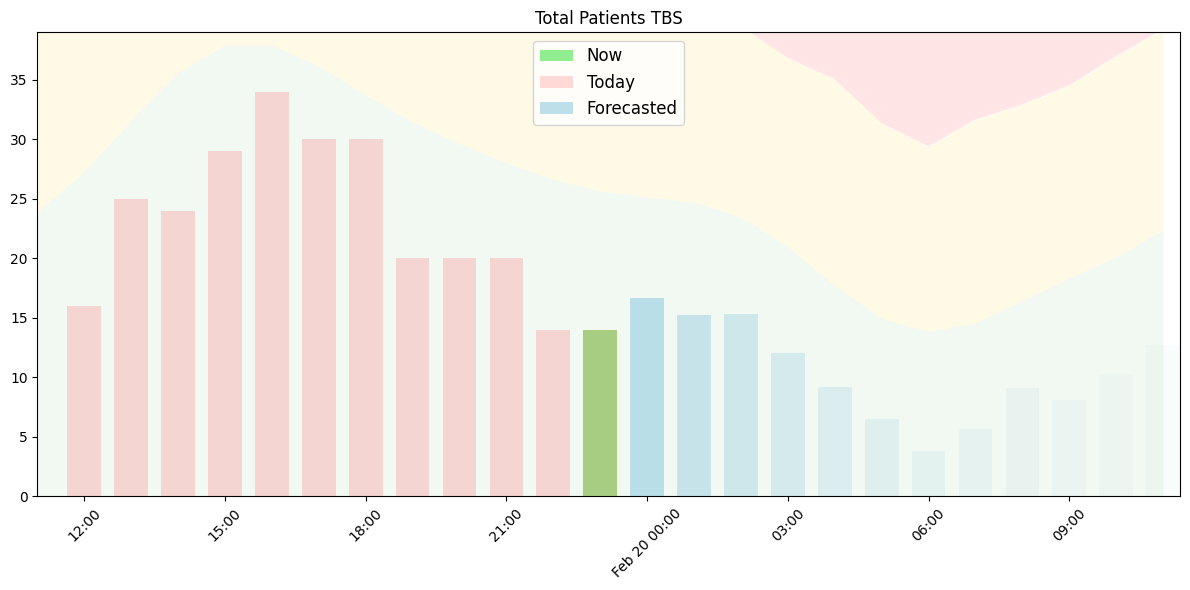

In [116]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
# Filter prophet_data to include only the last 12 hours and the next 12 hours
now = pd.to_datetime(data['ds']).iloc[-1]
prophet_data_filtered = prophet_data[(prophet_data['ds'] >= (now - pd.Timedelta(hours=12))) & (prophet_data['ds'] <= (now + pd.Timedelta(hours=12)))]

# ax.bar(prophet_data_filtered.ds, prophet_data_filtered['total_tbs_yhat'], width=0.03, color='#5293ff', alpha=0.4, label='Expected')  # Adjust width for hourly bars

ax.fill_between(prophet_data_filtered.ds, prophet_data_filtered['total_tbs_yhat'], color="green", alpha=0.05, lw=0)
ax.fill_between(prophet_data_filtered.ds, prophet_data_filtered['total_tbs_yhat'], prophet_data_filtered['total_tbs_yhat_upper'], color="gold", alpha=0.1, lw=0)
ax.fill_between(prophet_data_filtered.ds, prophet_data_filtered['total_tbs_yhat_upper'], 100, color="red", alpha=0.1, lw=0)


if data.tail(1).total_tbs.values[0] > prophet_data_filtered.set_index('ds').loc[data.tail(1).ds].total_tbs_yhat_upper.values[0]:
    now_color = 'red'
elif data.tail(1).total_tbs.values[0] > prophet_data_filtered.set_index('ds').loc[data.tail(1).ds].total_tbs_yhat_upper.values[0]:
    now_color = 'gold'
else:
    now_color = 'lightgreen'

ax.bar(
    data.tail(1).ds, data.tail(1).total_tbs, color=now_color, alpha=1, label='Now', width=0.03
)

plt.bar(
    data.tail(12).ds, data.tail(12).total_tbs, color='#ff4d4d', alpha=0.2, label='Today', width=0.03
)

my_index=0
for index,row in total_tbs_np.head(12).iterrows():
    my_index = my_index+1
    if my_index == 1:
        plt.bar(row.ds, row.yhat, color='lightblue', alpha=1*(math.pow(0.80,my_index)), label='Forecasted', width=0.03)
    else:
        plt.bar(row.ds, row.yhat, color='lightblue', alpha=1*(math.pow(0.80,my_index)), width=0.03)

# Formatting
# ax.set_xlabel("Time")
# ax.set_ylabel("Value")
ax.set_ybound(0,max([max(data.tail(12)['total_tbs']),max(total_tbs_np.head(12).yhat)])+5)

ax.set_title("Total Patients TBS")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Use AutoDateLocator for smart tick placement
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)

# Custom formatter: Show date at midnight, hours otherwise
def custom_formatter(x, pos):
    dt = mdates.num2date(x)  # Convert Matplotlib float date to datetime
    if dt.hour == 0:  # Show date at midnight
        return dt.strftime("%b %d %H:%M")
    else:  # Show time otherwise
        return dt.strftime("%H:%M")

ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))  # Correct usage
ax.margins(x=0)

fig.tight_layout()
plt.legend(fontsize=12)


plt.show()

In [42]:
prophet_data

,ds,total_tbs_yhat,total_tbs_yhat_lower,total_tbs_yhat_upper,Hour
0,2021-01-01 01:00:00,2.446247,-14.884725,19.497233,1
1,2021-01-01 02:00:00,1.343417,-15.322700,18.852873,2
2,2021-01-01 03:00:00,-0.997003,-16.180188,15.579914,3
3,2021-01-01 04:00:00,-4.088097,-19.282114,12.345861,4
4,2021-01-01 05:00:00,-6.662321,-21.621780,10.630576,5
...,...,...,...,...,...
36214,2025-02-20 16:00:00,36.089943,19.330356,52.976002,16
36215,2025-02-20 17:00:00,34.275283,18.686931,50.420459,17
36216,2025-02-20 18:00:00,31.813915,16.493488,48.276160,18
36217,2025-02-20 19:00:00,29.575896,12.570222,45.935425,19
